In [33]:
#Importando as bibliotecas
import numpy as np
import os
import matplotlib.pyplot as plt
import scipy.io as sc
import pandas as pd
import pymatreader as pytomat
from pymatreader import read_mat

In [ ]:
#Comando para leitura de dados .mat mas que não funciona com os dados de acelerôemtro (OBSOLETA)
# mat = sc.loadmat('G:\\.shortcut-targets-by-id\\1oKn7IN7zznQuhwjDCDdjq8r9wHJYBEhj\\DR_Train\\LRV4306\\gps_data\\25126_20151210_3_2_7_2gps.mat')
# mat['save_var_gps']
# df_teste = pd.DataFrame(mat['save_var_gps'])

In [3]:
#Visualizando os dados do acelerômetro

dataacer = read_mat('G:\\.shortcut-targets-by-id\\1oKn7IN7zznQuhwjDCDdjq8r9wHJYBEhj\\DR_Train\\LRV4306\\accelerometer_data\\39_20131121_1_1_5_1_3.mat')
pd.DataFrame(dataacer)

,save_var
0,0.313770
1,0.123914
2,0.009619
3,0.170537
4,0.132229
...,...
865442,0.172725
865443,0.127627
865444,0.201840
865445,0.342721


In [4]:
#Comando para criação de dataframe com os dados de GPS
datagps = read_mat('G:\\.shortcut-targets-by-id\\1oKn7IN7zznQuhwjDCDdjq8r9wHJYBEhj\\DR_Train\\LRV4313\\gps_data\\409_20150618_3_1_5_2gps.mat')
pd.DataFrame(datagps['save_var_gps'], columns=['Longitude', 'Latitude', 'Altitude', 'Velocity', 'Time_Stamp'])

,Longitude,Latitude,Altitude,Velocity,Time_Stamp
0,-80.019933,40.365635,323.4,49.6,736126.952870
1,-80.019770,40.365652,323.2,48.6,736126.952882
2,-80.019610,40.365668,323.0,49.6,736126.952894
3,-80.019450,40.365682,322.9,48.9,736126.952905
4,-80.019297,40.365697,322.3,47.0,736126.952917
...,...,...,...,...,...
537,-80.002412,40.406373,302.2,63.9,736126.959086
538,-80.002515,40.406512,302.7,65.4,736126.959097
539,-80.002613,40.406648,303.3,62.0,736126.959109
540,-80.002700,40.406785,303.8,61.3,736126.959120


In [5]:
df_gps_inbound = pd.read_csv('G:\\.shortcut-targets-by-id\\1oKn7IN7zznQuhwjDCDdjq8r9wHJYBEhj\\DR_Train\\ground_truth_rail_layout_GPS\\region5_inbound.csv', sep=',',
                         names=['dist', 'latit', 'longit'])


df_gps_outbound = pd.read_csv('G:\\.shortcut-targets-by-id\\1oKn7IN7zznQuhwjDCDdjq8r9wHJYBEhj\\DR_Train\\ground_truth_rail_layout_GPS\\region5_outbound.csv', sep=',',
                         names=['dist', 'latit', 'longit'])

In [6]:
#Comando para listar arquivos do diretório
print(os.listdir('G:\\.shortcut-targets-by-id\\1oKn7IN7zznQuhwjDCDdjq8r9wHJYBEhj\\DR_Train' ))
#\\ground_truth_rail_layout_GPS

['regions.fig', 'README.txt', 'regions.pdf', 'code', 'ground_truth_rail_layout_GPS', 'LRV4306', 'LRV4313', 'track_maintenance_logs', 'README_updated.txt']


In [7]:
#comando do Samuel para listar os arquivos da região 5
# diretory=['LRV4306\\accelerometer_data','LRV4306\\gps_data','LRV4313\\gps_data','LRV4313\\accelerometer_data']
# for i in range(0, len(diretory)-1):
#    files=os.listdir('G:\\.shortcut-targets-by-id\\1oKn7IN7zznQuhwjDCDdjq8r9wHJYBEhj\\DR_Train\\'+diretory[3])
#    for j in range(0,len(files)-1):
#        name=files[j].split("_")
#        if name[4]=='5' and name != 'desktop.ini':
#            print(name)

In [8]:
#Criando o Dataframe global com os dados de acelerômetro
trem = ['LRV4306','LRV4313']
path = 'G:\\.shortcut-targets-by-id\\1oKn7IN7zznQuhwjDCDdjq8r9wHJYBEhj\\DR_Train\\'
df_global = pd.DataFrame()

diretory=['LRV4306\\accelerometer_data', 'LRV4313\\accelerometer_data']
for i in range(0, len(diretory)):
    files=os.listdir(path+diretory[i])
    for j in range(0,len(files)-1):
        name=files[j].split("_")
        if name[4]=='5' and name != 'desktop.ini':
            file = int(name[0])
            date = int(name[1])
            root_index = int(name[2])
            daily_passing = int(name[3])
            region = int(name[4])
            running_direction = int(name[5])
            accelerometer = name[6].split(".mat")[0]
            arquivo = diretory[i]+'\\'+files[j]
            df_global = pd.concat([df_global, pd.DataFrame({'trem': [trem[i]], 'file': [file], 'date': [date],'root_index': [root_index],
                     'daily_passing': [daily_passing], 'region': [region], 'running_direction': [running_direction], 'accelerometer': accelerometer, 'arquivo': arquivo})], ignore_index = True)

In [9]:
#acrescentando os dados de GPS também, mas colocando valor negativo na posição do acelerômetro pra representar valor nulo
accelerometer = -1
#df_global = pd.DataFrame()

diretory=['LRV4306\\gps_data','LRV4313\\gps_data']
for i in range(0, len(diretory)):
    files=os.listdir(path+diretory[i])
    for j in range(0,len(files)-1):
        name=files[j].split("_")
        if name[4]=='5' and name != 'desktop.ini':
            file = int(name[0])
            date = int(name[1])
            root_index = int(name[2])
            daily_passing = int(name[3])
            region = int(name[4])
            running_direction = int(name[5].split("gps")[0])
            arquivo = diretory[i]+'\\'+files[j]
            df_global = pd.concat([df_global, pd.DataFrame({'trem': [trem[i]], 'file': [file], 'date': [date],'root_index': [root_index],
                     'daily_passing': [daily_passing], 'region': [region], 'running_direction': [running_direction], 'accelerometer': accelerometer, 'arquivo': arquivo})], ignore_index = True)

In [12]:
df_global

,trem,file,date,root_index,daily_passing,region,running_direction,accelerometer,arquivo
0,LRV4306,14821,20150108,8,4,5,1,5,LRV4306\accelerometer_data\14821_20150108_8_4_...
1,LRV4306,14823,20150108,8,4,5,2,2,LRV4306\accelerometer_data\14823_20150108_8_4_...
2,LRV4306,14822,20150108,8,4,5,2,1,LRV4306\accelerometer_data\14822_20150108_8_4_...
3,LRV4306,14824,20150108,8,4,5,2,3,LRV4306\accelerometer_data\14824_20150108_8_4_...
4,LRV4306,14825,20150108,8,4,5,2,4,LRV4306\accelerometer_data\14825_20150108_8_4_...
...,...,...,...,...,...,...,...,...,...
5648,LRV4313,2481,20150924,2,2,5,1,-1,LRV4313\gps_data\2481_20150924_2_2_5_1gps.mat
5649,LRV4313,2489,20150924,2,2,5,2,-1,LRV4313\gps_data\2489_20150924_2_2_5_2gps.mat
5650,LRV4313,2577,20150924,2,3,5,1,-1,LRV4313\gps_data\2577_20150924_2_3_5_1gps.mat
5651,LRV4313,2585,20150924,2,3,5,2,-1,LRV4313\gps_data\2585_20150924_2_3_5_2gps.mat


2 6
26 10
35 11
31 14
2 27
4 30
2 51
30 60
31 78
9 132
39 193
9 202
15 203
2 226
18 239
15 277
2 299
23 301
4 304
14 308
6 314


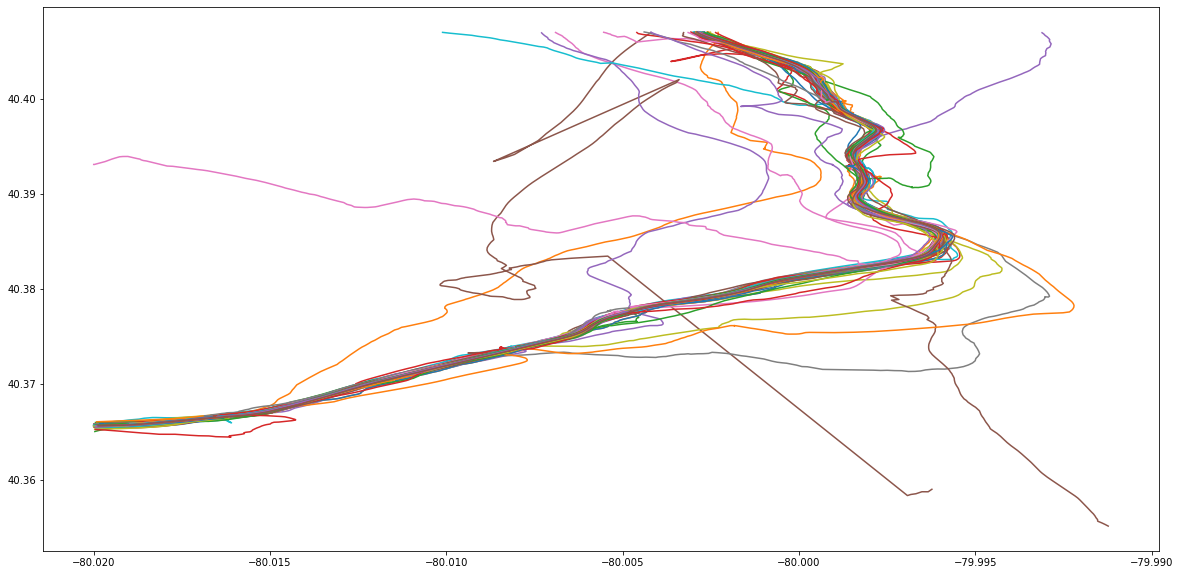

In [252]:
aux = np.array(df_global.loc[(df_global['trem'] == 'LRV4306') & (df_global['accelerometer'] == -1)
                             & (df_global['running_direction'] == 1), 'arquivo'])
plt.figure(figsize=[20,10])
x = pd.DataFrame()
y = pd.DataFrame()

for i in range(0, len(aux)):
    #print(aux[i])
    df_gps = pd.DataFrame(read_mat(path+aux[i])['save_var_gps'], columns=['Longitude', 'Latitude', 'Altitude', 'Velocity', 'Time_Stamp'])
    #x = pd.concat([x, df_gps.Longitude], axis = 1, ignore_index = True)
    #y = pd.concat([y, df_gps.Latitude], axis = 1, ignore_index = True)
    x = df_gps.Longitude
    y = df_gps.Latitude
    if(len(x) < 75 or len(y) < 75):
        print(str(len(x)) + ' ' + str(i))
    else:
        plt.plot(x,y)
    
    #plt.plot(x,y)

### Observações sobre dados de GPS:

##### Os dados de GPS (e provavelmente o de acelerômetro também) não possuem a mesma quantidade de linhas, de modo que a comparação da posição 10 de longitude e latitude de arquivos diferentes, por exemplo, não necessariamente correspondem a mesma posição. Desse modo, a aquisição do trajeto por meio de simples artifícios estatísticos como média, mediana e moda não funcionam.

##### Um outro ponto é que alguns dados de gps (e provavelmente pode ocorrer com o de acelerômetro também) possuem poucos registros, por exemplo dois pontos apenas de longitude e latitude. Essa falta de dados torna inutilizável o arquivo. Sendo assim, estes devem ser excluídos. Por coincidência, alguns desses são outliers. Mas ainda há outliers a serem tratados.

###### Dica: Analisar dados outbound separados do inbound a priori.

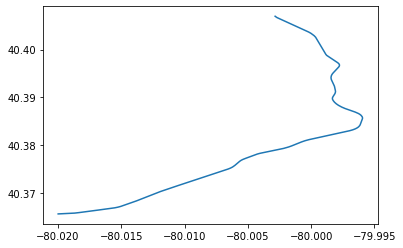

In [168]:
#Verificando inbound e outbound
x_in = df_gps_inbound.longit
y_in = df_gps_inbound.latit
x_out = df_gps_outbound.longit
y_out = df_gps_outbound.latit
plt.figure()
plt.plot(x_in,y_in)